<a href="https://colab.research.google.com/github/Antra3/SC-CPE31S1_FinalProj/blob/main/SC_CPE31S1_FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.3 MB/s eta 0:00:00


Enter the rotation around the X-axis (theta): 8
Enter the phase parameter (phi): 3.14
Enter the phase parameter (lambda): 5
Statevector Quantum Circuit:
   ┌─────────────┐
q: ┤ U(8,3.14,5) ├
   └─────────────┘

Measurement Quantum Circuit:
     ┌─────────────┐┌─┐
  q: ┤ U(8,3.14,5) ├┤M├
     └─────────────┘└╥┘
c: 1/════════════════╩═
                     0 

State Vector after U Gate:
Statevector([-0.65364362+0.j        ,  0.75680154-0.00120532j],
            dims=(2,))


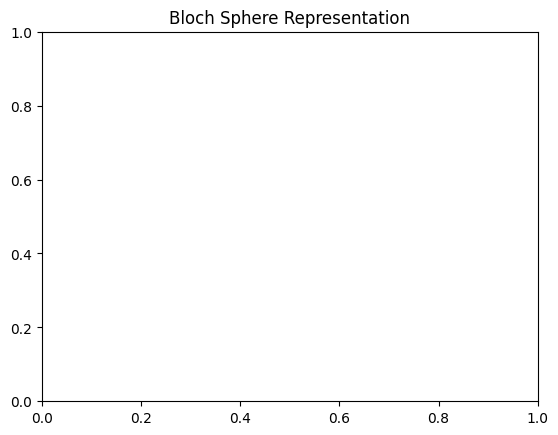

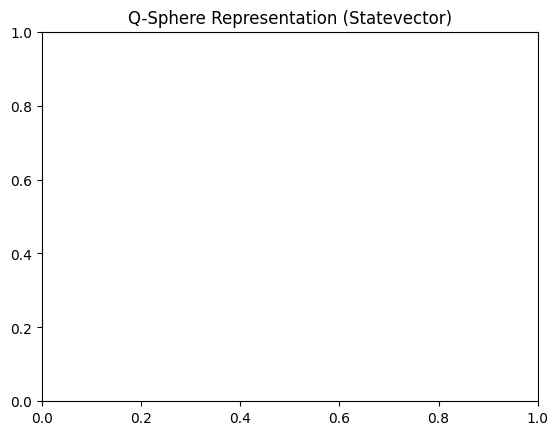


Density Matrix:
DensityMatrix([[ 0.42724998+0.00000000e+00j, -0.4946785 -7.87852148e-04j],
               [-0.4946785 +7.87852148e-04j,  0.57275002+4.07800943e-20j]],
              dims=(2,))


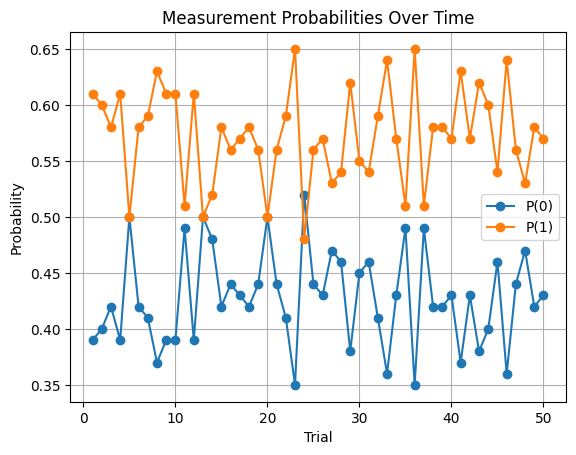

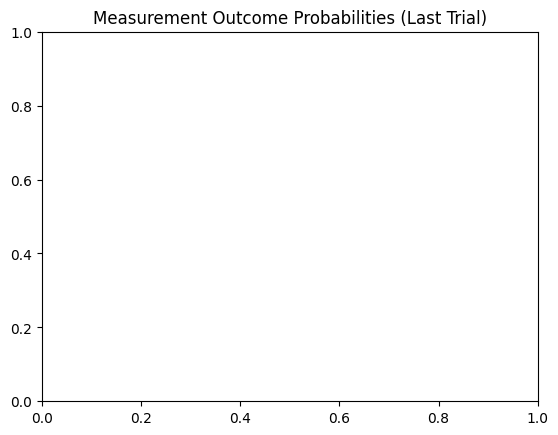

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
import os  # For fallback display
from IPython.display import display, Image as IPImage

# Function to display images
def show_image(filename):
    try:
        display(IPImage(filename=filename))  # For Jupyter Notebook
    except NameError:
        os.system(f"start {filename}")  # For Windows
        # os.system(f"xdg-open {filename}")  # For Linux
        # os.system(f"open {filename}")  # For macOS

# Input parameters
theta = float(input("Enter the rotation around the X-axis (theta): "))
phi = float(input("Enter the phase parameter (phi): "))
lam = float(input("Enter the phase parameter (lambda): "))

# Quantum circuit for statevector simulation
statevector_qc = QuantumCircuit(1)
statevector_qc.u(theta, phi, lam, 0)

# Quantum circuit for measurement simulation
measurement_qc = QuantumCircuit(1, 1)
measurement_qc.u(theta, phi, lam, 0)
measurement_qc.measure(0, 0)

print("Statevector Quantum Circuit:")
print(statevector_qc)
print("\nMeasurement Quantum Circuit:")
print(measurement_qc)

# Simulate using AerSimulator
state_simulator = AerSimulator(method='statevector')
qasm_simulator = AerSimulator()

# Transpile circuits
transpiled_statevector_qc = transpile(statevector_qc, state_simulator)
transpiled_measurement_qc = transpile(measurement_qc, qasm_simulator)

# Get statevector
statevector = Statevector.from_instruction(transpiled_statevector_qc)
print("\nState Vector after U Gate:")
print(statevector)

# Visualize Bloch Sphere
plt.figure()
bloch_plot = plot_bloch_multivector(statevector.data)
plt.title("Bloch Sphere Representation")
plt.savefig('bloch_sphere_output.png')
plt.show()  # Display the plot immediately

# Visualize Q-Sphere
plt.figure()
qsphere_plot = plot_state_qsphere(statevector.data)
plt.title("Q-Sphere Representation (Statevector)")
plt.savefig('qsphere_statevector_output.png')
plt.show()  # Display the plot immediately

# Get density matrix
density_matrix = DensityMatrix(statevector)
print("\nDensity Matrix:")
print(density_matrix)

# **Note:** Q-Sphere visualization for density matrices might not be directly applicable.
# Consider using other visualization techniques or libraries like QuTiP.

# Measurement probabilities
trials = 50
shots_per_trial = 100
outcomes_over_time = []

for trial in range(trials):
    result = qasm_simulator.run(transpiled_measurement_qc, shots=shots_per_trial).result()
    counts = result.get_counts()
    prob_0 = counts.get('0', 0) / shots_per_trial
    prob_1 = counts.get('1', 0) / shots_per_trial
    outcomes_over_time.append((prob_0, prob_1))

outcomes_array = np.array(outcomes_over_time)

# Plot probabilities over time
plt.figure()
plt.plot(range(1, trials + 1), outcomes_array[:, 0], label="P(0)", marker="o")
plt.plot(range(1, trials + 1), outcomes_array[:, 1], label="P(1)", marker="o")
plt.xlabel("Trial")
plt.ylabel("Probability")
plt.title("Measurement Probabilities Over Time")
plt.legend()
plt.grid(True)
plt.savefig('measurement_probabilities_over_time.png')
plt.show()  # Display the plot immediately

# Histogram of last trial
plt.figure()
if counts:
    plot_histogram(counts)
    plt.title("Measurement Outcome Probabilities (Last Trial)")
    plt.savefig('measurement_histogram_output.png')
    plt.show()  # Display the plot immediately
else:
    print("No measurement results found. Ensure the quantum circuit has a measurement step.")

measurement_outcome = input("Enter the measurement outcome you'd like to analyze (e.g., '0' or '1'): ")
if measurement_outcome in counts:
    print(f"Outcome '{measurement_outcome}' was measured with probability: {counts[measurement_outcome] / shots_per_trial}")
else:
    print("Invalid measurement outcome. Please enter a valid value ('0' or '1').")